## Observations and Insights 

There is a strong correlation between mouse weight and the average tumor volume.

The most mice were tested with the drugs Capomulin and Ramicane. They appear to be the leading durg candidates with the lowest tumor volume along the measures of central tendency.

The gender of the mice used in the study was split near equally between female and male. This will help account for any trearment differences that may occur between the genders.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_study_df[:10]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df["Mouse ID"].value_counts()

g989    13
c832    10
g296    10
k382    10
c139    10
        ..
v199     1
l872     1
h428     1
x336     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'g989']
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != "g989"]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

mouse_groupby = mouse_df.groupby('Drug Regimen')
mouse_summary = mouse_groupby['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean' : 'Mean Tumor Volume',
                                                                                                      'median' : 'Median Tumor Volume',
                                                                                                      'var' : 'Tumor Volume Variance',
                                                                                                      'std' : 'Tumor Volume Std. Dev', 
                                                                                                        'sem' : 'Tumor Volume Std. Err.'})

mouse_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

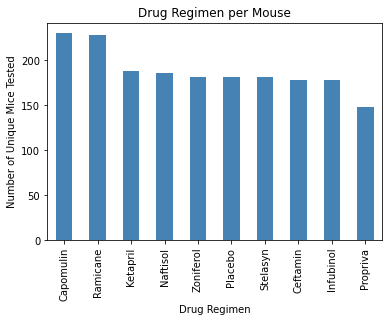

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_pd = mouse_df["Drug Regimen"].value_counts().to_frame()

mouse_pd.plot(kind="bar", color='steelblue', legend=False)

plt.title("Drug Regimen per Mouse")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.show()


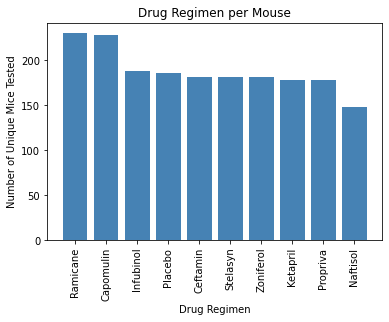

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_data = mouse_df['Drug Regimen'].value_counts()
drugs = mouse_df['Drug Regimen'].unique()  
plt.bar(drugs, mice_data, color='steelblue', align="center")
plt.xticks(rotation=90)

plt.title("Drug Regimen per Mouse")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.show()


In [11]:
mice_female = mouse_df.loc[mouse_df['Sex'] == 'Female']
mice_male = mouse_df.loc[mouse_df['Sex'] == 'Male']

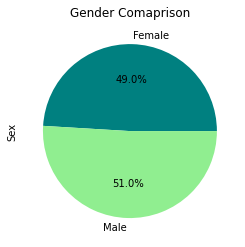

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_pie_pd = pd.DataFrame({'Sex' : [len(mice_female),len(mice_male)]    
                            }, index=['Female', 'Male'])


mouse_pie_pd.plot(kind="pie", y='Sex', autopct='%1.1f%%',legend=False, colors=['teal','lightgreen'])

plt.title("Gender Comaprison")

plt.show()

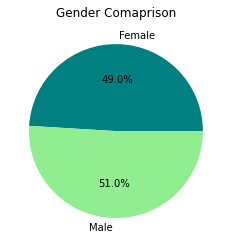

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
s = [len(mice_female), len(mice_male)]

plt.pie(s, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['teal','lightgreen'])

plt.title("Gender Comaprison")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# treatment_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Ramicane']
# # treatment_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']
# treatment_df

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_mID = mouse_df.groupby('Mouse ID')

max_tp = group_mID['Timepoint'].max().to_frame()
max_tp = max_tp.rename(columns = {'Timepoint' : 'Final Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_merge_df = pd.merge(mouse_df, max_tp, on='Mouse ID', how="outer")

#Manipulate the dataframe so that only the final timepoint is listed
mouse_final_tp = treatment_merge_df.drop_duplicates(subset='Mouse ID', keep='last')

In [19]:
#Starter Code Provided by Instructor

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mouse_final_tp.loc[mouse_final_tp["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


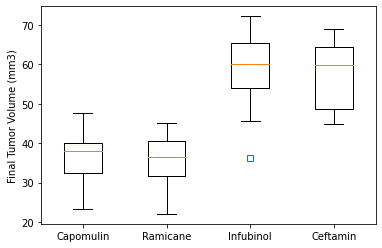

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

custom_outlier = {'flierprops': dict(marker='s', markeredgecolor='#2068DB')}

plt.boxplot(tumor_vol_list, labels = treatment_list, **custom_outlier)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [56]:
capomulin_df = mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']
capomulin_df[:10]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [57]:
l509_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']
l509_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


In [58]:
len(capomulin_df['Mouse ID'].unique())

25

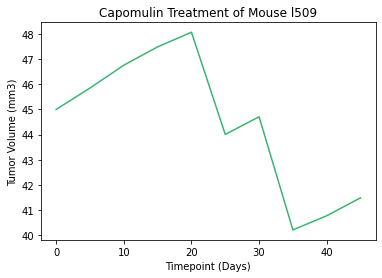

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(l509_df['Timepoint'], l509_df['Tumor Volume (mm3)'], color='mediumseagreen')

plt.title("Capomulin Treatment of Mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")

plt.show()

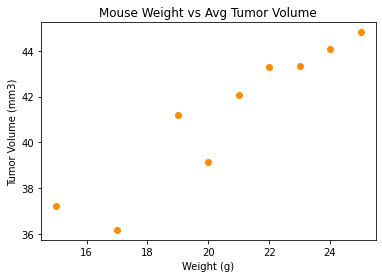

In [60]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grouped_capomulin = capomulin_df.groupby('Weight (g)')
avg_tumor_vol = grouped_capomulin['Tumor Volume (mm3)'].mean()
capomluin_weight = capomulin_df.drop_duplicates(subset='Weight (g)')

plt.scatter(capomluin_weight['Weight (g)'], avg_tumor_vol,  color='darkorange')

plt.title("Mouse Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.87


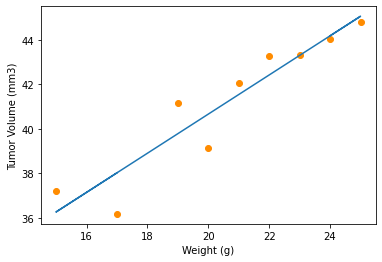

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomluin_weight['Weight (g)'],avg_tumor_vol)
regress_values = capomluin_weight['Weight (g)'] * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is: {round(rvalue**2,2)}")
plt.scatter(capomluin_weight['Weight (g)'], avg_tumor_vol,  color='darkorange')
plt.plot(capomluin_weight['Weight (g)'],regress_values)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()